<a href="https://colab.research.google.com/github/AnasZol/Stats_BI_2022/blob/Homework_1/Homework_lecture_5/Homework_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [3]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# В переменную data_path надо положить путь до данных
data_path = "/content/drive/MyDrive/Colab Notebooks"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [5]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [6]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

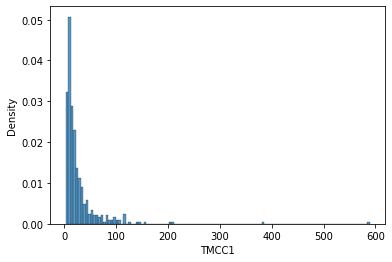

In [7]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

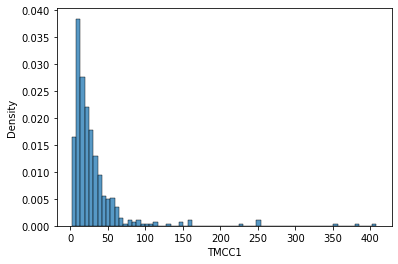

In [8]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [9]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    for i in range(n_samples):
        sample = np.random.choice(expressions, size=sample_size)
        mean_expressions.append(np.mean(sample))
    return pd.Series(mean_expressions, name=expressions.name)

[Text(0.5, 1.0, 'for B cells')]

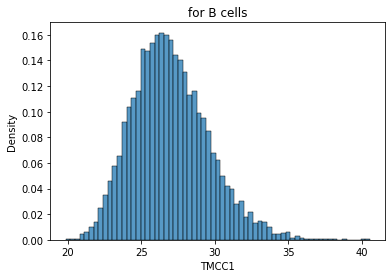

In [10]:
# for TMCC1 in B cells
n_samples = 10000
sample_size = 250
example_gene = "TMCC1"
expressions = b_cells_expression_data[example_gene]
mean_expressions_B = demonstrate_clt(expressions=expressions,
                                   sample_size=sample_size, 
                                   n_samples=n_samples)

sns.histplot(mean_expressions_B, stat="density").set(title='for B cells')

[Text(0.5, 1.0, 'for NK cells')]

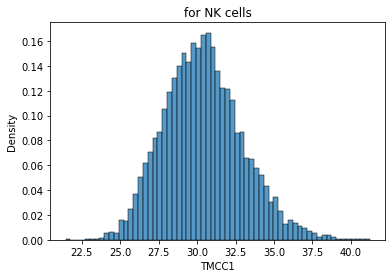

In [11]:
# for TMCC1 in NK cells
n_samples = 10000
sample_size = 250
example_gene = "TMCC1"
expressions = nk_cells_expression_data[example_gene]
mean_expressions_NK = demonstrate_clt(expressions=expressions,
                                   sample_size=sample_size, 
                                   n_samples=n_samples)

sns.histplot(mean_expressions_NK, stat="density").set(title='for NK cells')

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [12]:
sample_size = 250

# mu, std, and se for B cells
mu_B = np.mean(b_cells_expression_data[example_gene])
std_B = np.std(b_cells_expression_data[example_gene])
se_B = std_B / np.sqrt(sample_size)


# CI for B cells
mean_mean_B = np.mean(mean_expressions_B)
leftb_B = mean_mean_B - 1.96 * se_B
rightb_B = mean_mean_B + 1.96 * se_B

leftb_B, rightb_B, mu_B, se_B

(21.95376243362839, 31.985009850321056, 26.978971829200002, 2.5589916879318033)

In [13]:
# mu, std, and se for NK cells
mu_NK = np.mean(nk_cells_expression_data[example_gene])
std_NK = np.std(nk_cells_expression_data[example_gene])
se_NK = std_NK / np.sqrt(sample_size)

# CI for NK cells
mean_mean_NK = np.mean(mean_expressions_NK)
leftb_NK = mean_mean_NK - 1.96 * se_NK
rightb_NK = mean_mean_NK + 1.96 * se_NK

leftb_NK, rightb_NK, mu_NK, se_NK

(25.357938686852123, 35.4639269078534, 30.4313196004, 2.5780582196431827)

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [14]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [15]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [16]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

**Вывод**: 95% доверительные интервалы наших выборок пересекаются, значит средняя экспрессия гена *TMCC1* для B и NK типов клеток не отличается

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [17]:
# function for checking CI intersection 
def check_intervals_intersect(first_ci, second_ci):   
    # transforms first_ci tuple to pd.Interval()
    first_ci = pd.Interval(*first_ci, closed='both') 
    # transforms second_ci tuple to pd.Interval()
    second_ci = pd.Interval(*second_ci, closed='both') 
    are_intersect = first_ci.overlaps(second_ci)
    return are_intersect # True or False

In [18]:
# B клетки
first_ci = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

# NK клетки
second_ci = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

check_intervals_intersect(first_ci=first_ci, second_ci=second_ci)

True

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [19]:
# function for calculation of all CI for cell types
def ci_intervals(expressions):
    all_intervals = []
    for gene in expressions.columns:
        if expressions[gene].dtype in (int, float):
            gene_ci = st.t.interval(alpha=0.95, # 95% доверительный интервал
                      df=len(expressions[gene]) - 1, # число степеней свободы - 1
                      loc=np.mean(expressions[gene]), # Среднее
                      scale=st.sem(expressions[gene])) # Стандартная ошибка среднего
            all_intervals.append(gene_ci) 
    return all_intervals

In [20]:
# all CI for B cells
expressions = b_cells_expression_data
all_intervals_B = ci_intervals(expressions=expressions)
all_intervals_B[:10]

[(23.420272072079296, 30.53767158632071),
 (40.66605746899466, 43.647858079005324),
 (0.16491871145103376, 6.693154078772565),
 (4.478209446304184, 5.386014119255815),
 (5.9789902822075565, 12.141109515370443),
 (66.07500750026978, 71.03745000973024),
 (32.092790204855675, 36.94138070714433),
 (0.16519838487656902, 3.525336753774404),
 (2.6930563856523215, 5.239175550587678),
 (17.008063850743856, 19.131670780056144)]

In [21]:
# all CI for NK cells
expressions = nk_cells_expression_data
all_intervals_nk = ci_intervals(expressions=expressions)
all_intervals_nk[:10]

[(26.84610468807562, 34.01653451272438),
 (45.82365268771322, 51.43822479828677),
 (0.4300389516748502, 4.90121975138789),
 (5.591555697440395, 10.941515282239607),
 (5.564808406875493, 7.104360627223306),
 (66.00919515957982, 73.25278561642018),
 (35.51361067108365, 40.273806876916346),
 (0.6929627125519762, 5.645389577308465),
 (3.0215439419876136, 4.591565056252386),
 (24.238740580039558, 29.223494805960446)]

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [22]:
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression
    all_intervals_B = ci_intervals(expressions=first_table)
    all_intervals_nk = ci_intervals(expressions=second_table)
    
    ci_test_results = []
    for index in range(len(all_intervals_B)):
        intersection = check_intervals_intersect(first_ci=all_intervals_B[index], 
                                                 second_ci=all_intervals_nk[index])
        ci_test_results.append(intersection)     
    return ci_test_results

In [23]:
first_table = b_cells_expression_data
second_table = nk_cells_expression_data
ci_test_results = check_dge_with_ci(first_table, second_table)
ci_test_results[:10]

[True, False, True, False, True, True, True, True, True, False]

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [24]:
from statsmodels.stats.weightstats import ztest

In [25]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [26]:
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression
    z_test_results = []
    for gene in first_table.columns:
        if first_table[gene].dtype in (int, float):
            gene_z_value = ztest(first_table[gene], 
                                 second_table[gene])
            z_test_results.append((gene_z_value[1] > 0.05, 
                                   round(gene_z_value[1], ndigits=4)))    
    return z_test_results

In [27]:
first_table = b_cells_expression_data
second_table = nk_cells_expression_data
z_test_results = check_dge_with_ztest(first_table=first_table, second_table=second_table)
z_test_results[:10]

[(True, 0.1794),
 (False, 0.0001),
 (True, 0.7046),
 (False, 0.0158),
 (True, 0.0918),
 (True, 0.6305),
 (True, 0.0509),
 (True, 0.3847),
 (True, 0.834),
 (False, 0.0)]

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

### **Задание 4** оформлено в виде скрипта *hw_lecture5_task4.py* с файлом *requirements.txt* в **Github** репозитории 

## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

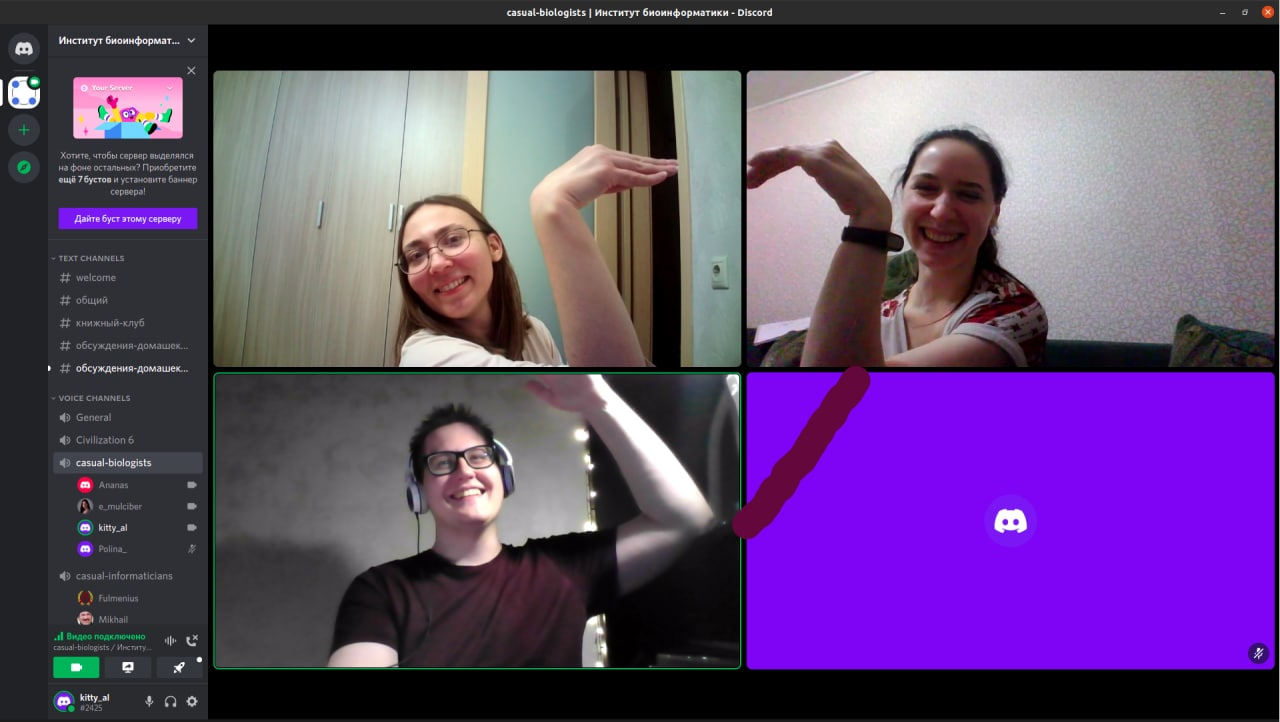